# Import Required Libraries
Import the necessary libraries, including NetworkX and Matplotlib.

In [2]:
# pip to install networkx
!pip install networkx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [3]:
# Import the necessary libraries
import networkx as nx
import matplotlib.pyplot as plt

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

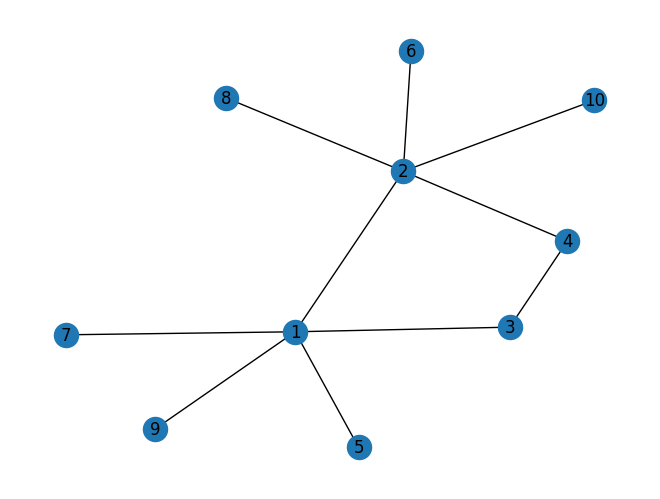

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
# G.add_edges_from([(1, 2), (1, 3), (3, 4), (2,2), (2, 4)])
# create a nice graph with ten nodes and a couple of parallel ones
G.add_edges_from([(1, 2), (1, 3), (3, 4), (2, 4), (1, 5), (2, 6), (1, 7), (2, 8), (1, 9), (2, 10)])
# make edges not cross each other
pos = nx.spring_layout(G)
# draw edges curved
#pos = nx.circular_layout(G)


nx.draw(G, pos, with_labels=True)
plt.show()

In [11]:
!pip install netgraph

  Using cached scipy-1.14.1-cp312-cp312-macosx_14_0_arm64.whl.metadata (60 kB)
Using cached scipy-1.14.1-cp312-cp312-macosx_14_0_arm64.whl (23.1 MB)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


/Users/thomas/development/lectures/algorithms-course-material/.venv/lib/python3.12/site-packages/netgraph/_utils.py:360: RuntimeWarning: invalid value encountered in divide
  v = v / np.linalg.norm(v, axis=-1)[:, None] # unit vector


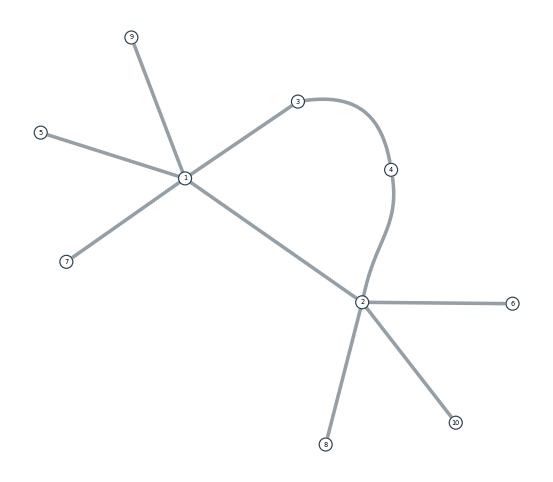

In [17]:
import networkx as nx
from netgraph import Graph
import matplotlib.pyplot as plt

# Define the graph with nodes and edges
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (3, 4), (2, 4), (1, 5), (2, 6), (1, 7), (2, 8), (1, 9), (2, 10)])

# Generate the layout
pos = nx.spring_layout(G)  # Create a spring layout for better visualization

# Draw the graph using netgraph
plt.figure(figsize=(8, 6))
Graph(G, node_layout=pos, edge_layout='curved', node_labels=True, edge_width=1.5)
plt.show()

# Graph Representation
Demonstrate how to represent graphs using adjacency lists and adjacency matrices.

In [ ]:
# Graph Representation

# Create a graph using an adjacency list
adj_list_graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

# Create a graph using an adjacency matrix
import numpy as np

nodes = ['A', 'B', 'C', 'D', 'E', 'F']
adj_matrix_graph = np.array([
    [0, 1, 1, 0, 0, 0],  # A
    [1, 0, 0, 1, 1, 0],  # B
    [1, 0, 0, 0, 0, 1],  # C
    [0, 1, 0, 0, 0, 0],  # D
    [0, 1, 0, 0, 0, 1],  # E
    [0, 0, 1, 0, 1, 0]   # F
])

# Visualize the graph using NetworkX and Matplotlib
G = nx.Graph()

# Add nodes
for node in nodes:
    G.add_node(node)

# Add edges from adjacency list
for node, neighbors in adj_list_graph.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=15)
plt.title('Graph Representation using Adjacency List')
plt.show()

# Print adjacency matrix
print("Adjacency Matrix:")
print(adj_matrix_graph)

# Depth-First Search (DFS)
Implement the Depth-First Search algorithm and apply it to a sample graph.

In [ ]:
# Depth-First Search (DFS) Implementation

# Define the DFS function
def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    print(start, end=' ')
    for next_node in graph[start] - visited:
        dfs(graph, next_node, visited)
    return visited

# Convert adjacency list to a set representation for DFS
adj_list_graph_set = {node: set(neighbors) for node, neighbors in adj_list_graph.items()}

# Perform DFS starting from node 'A'
print("Depth-First Search starting from node 'A':")
dfs(adj_list_graph_set, 'A')

# Breadth-First Search (BFS)
Implement the Breadth-First Search algorithm and apply it to a sample graph.

In [ ]:
# Breadth-First Search (BFS) Implementation

from collections import deque

def bfs(graph, start):
    visited = set()
    queue = deque([start])
    visited.add(start)
    
    while queue:
        vertex = queue.popleft()
        print(vertex, end=' ')
        
        for neighbor in graph[vertex]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)

# Perform BFS starting from node 'A'
print("\nBreadth-First Search starting from node 'A':")
bfs(adj_list_graph, 'A')

# Dijkstra's Algorithm
Implement Dijkstra's Algorithm for finding the shortest path in a weighted graph.

In [ ]:
# Dijkstra's Algorithm

import heapq

def dijkstra(graph, start):
    # Initialize distances with infinity and set the distance to the start node to zero
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0
    
    # Priority queue to hold nodes to explore
    priority_queue = [(0, start)]
    
    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)
        
        # If the distance in the queue is greater than the recorded distance, skip processing
        if current_distance > distances[current_node]:
            continue
        
        # Explore neighbors
        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            
            # If a shorter path is found
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))
    
    return distances

# Define a weighted graph using an adjacency list
weighted_graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'A': 1, 'D': 2, 'E': 5},
    'C': {'A': 4, 'F': 3},
    'D': {'B': 2},
    'E': {'B': 5, 'F': 1},
    'F': {'C': 3, 'E': 1}
}

# Perform Dijkstra's algorithm starting from node 'A'
print("\nDijkstra's Algorithm starting from node 'A':")
distances = dijkstra(weighted_graph, 'A')
for node, distance in distances.items():
    print(f"Distance from A to {node}: {distance}")

# Graph Visualization
Use Matplotlib and NetworkX to visualize graphs and the results of graph algorithms.

In [ ]:
# Graph Visualization

# Visualize the graph using NetworkX and Matplotlib
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightgreen', edge_color='black', node_size=2000, font_size=15)
plt.title('Graph Visualization using NetworkX')
plt.show()

# Visualize the results of DFS
dfs_edges = list(nx.dfs_edges(G, source='A'))
dfs_tree = nx.DiGraph(dfs_edges)
plt.figure(figsize=(8, 6))
nx.draw(dfs_tree, with_labels=True, node_color='lightcoral', edge_color='black', node_size=2000, font_size=15)
plt.title('DFS Tree Visualization')
plt.show()

# Visualize the results of BFS
bfs_edges = list(nx.bfs_edges(G, source='A'))
bfs_tree = nx.DiGraph(bfs_edges)
plt.figure(figsize=(8, 6))
nx.draw(bfs_tree, with_labels=True, node_color='lightblue', edge_color='black', node_size=2000, font_size=15)
plt.title('BFS Tree Visualization')
plt.show()

# Visualize the results of Dijkstra's Algorithm
dijkstra_edges = []
for node, neighbors in weighted_graph.items():
    for neighbor, weight in neighbors.items():
        if distances[neighbor] == distances[node] + weight:
            dijkstra_edges.append((node, neighbor))

dijkstra_tree = nx.DiGraph(dijkstra_edges)
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(dijkstra_tree)
nx.draw(dijkstra_tree, pos, with_labels=True, node_color='lightyellow', edge_color='black', node_size=2000, font_size=15)
edge_labels = {(u, v): f"{weighted_graph[u][v]}" for u, v in dijkstra_edges}
nx.draw_networkx_edge_labels(dijkstra_tree, pos, edge_labels=edge_labels)
plt.title('Dijkstra\'s Algorithm Result Visualization')
plt.show()